<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---

## Model Submission Guide: World Happiness Classification Competition
Let's share our models to a centralized leaderboard, so that we can collaborate and learn from the model experimentation process...

**Instructions:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model 
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



Link to repo: https://github.com/ruiqixue16/World-Happiness-ML-Models

## 1. Get data in and set up X_train, X_test, y_train objects

In [2]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 KB 32.6 MB/s eta 0:00:00
     ━━━━━━

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


## Explore bivariate results

In [4]:
temp = y_train.idxmax(1)
temp = pd.Series(temp)
a = pd.DataFrame({ 'happiness': temp})
b = a.join(X_train)

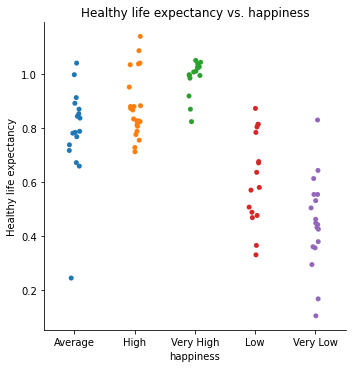

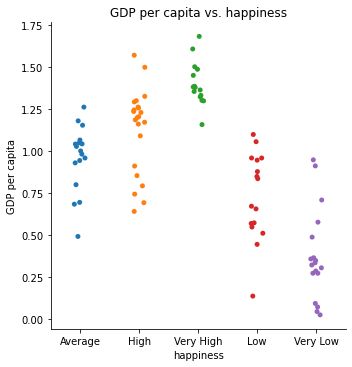

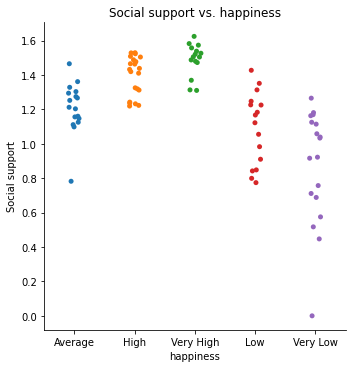

In [5]:
import matplotlib as mpl 
from matplotlib import pyplot as plt 
import seaborn as sns

sns.catplot(data=b, x="happiness", y="Healthy life expectancy").set(title = 'Healthy life expectancy vs. happiness')
sns.catplot(data=b, x="happiness", y="GDP per capita").set(title = 'GDP per capita vs. happiness')
sns.catplot(data=b, x="happiness", y="Social support").set(title = 'Social support vs. happiness')

#### Based on the graphs, it appears that there is a general positive correlation between the three variables and the happiness indcator. That is to say, high healthy life expectancy, gdp per capita, and social support are correlated to higher scores of happiness. This trend is exceptionally true for social support, as very high happiness has the highest cohort of social support, while very low happiness has the lowest range of social support. 

## Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [7]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [8]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

## Examine features that predict happiness categories using one or more models that allow for automatic feature selection


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [11]:
model = RandomForestClassifier(n_estimators=300, max_depth=5)
model.fit(preprocessor(X_train), y_train_labels)
model.feature_importances_

array([0.20066256, 0.14270544, 0.1490985 , 0.09500828, 0.08248082,
       0.08985083, 0.07867136, 0.02523329, 0.01021048, 0.01221925,
       0.0126892 , 0.00068143, 0.00022765, 0.00298376, 0.00206202,
       0.00259294, 0.01097618, 0.00653344, 0.00067269, 0.00444154,
       0.00667448, 0.00766852, 0.00820525, 0.03094657, 0.00818005,
       0.00832346])

#### based on the results, it seems as the first three features play a crucial role at predicting happiness, and the features coincide with the variables that were selected for the bivariate visualizations. Together, they suggest that GDP, life expectency, and social support are important.

## Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)

### My test model

In [12]:
modelt = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_leaf = 1, min_samples_split = 2)
modelt.fit(preprocessor(X_train), y_train_labels)
modelt.score(preprocessor(X_train), y_train_labels)

0.9204545454545454

In [13]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(modelt, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [14]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [15]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [16]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model test: 
prediction_labels = modelt.predict(preprocessor(X_test))
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

### My first model

In [17]:
# Submit the first model using GridSearchCV

param_grid = {'n_estimators': np.arange(100, 500, 100),'max_depth':[1, 5, 1]} #np.arange creates sequence of numbers for each k value

rfmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
a = rfmodel.fit(preprocessor(X_train), y_train_labels)
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(a.best_score_))
print("best parameters: {}".format(a.best_params_))

best mean cross-validation score: 0.669
best parameters: {'max_depth': 5, 'n_estimators': 100}


In [18]:
model = RandomForestClassifier(n_estimators=300, max_depth=5)
model.fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

0.9545454545454546

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8522727272727273

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

### My second model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Submit Model 2 to Competition Leaderboard
param_grid = {'n_estimators': np.arange(0, 100, 10),'max_depth':[1, 5, 1],'learning_rate':[0,1,0.2],'max_depth':[0,1,0.2]}

gbmodel = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid).fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gbmodel.best_score_))
print("best parameters: {}".format(gbmodel.best_params_))


best mean cross-validation score: 0.603
best parameters: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 10}


In [24]:
model2 = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=1, random_state=0)
model2.fit(preprocessor(X_train), y_train_labels)
model2.score(preprocessor(X_train), y_train_labels)

0.9772727272727273

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model2.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


### My third model

In [25]:
# Submit Model 3 to Competition Leaderboard
param_grid = {'n_estimators': np.arange(0, 300, 50),'max_depth':np.arange(1, 5, 1),'learning_rate':np.arange(0,1,0.2),'max_depth':np.arange(0,1,0.2)}

gbmodel = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid).fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gbmodel.best_score_))
print("best parameters: {}".format(gbmodel.best_params_))


best mean cross-validation score: 0.250
best parameters: {'learning_rate': 0.2, 'max_depth': 0.2, 'n_estimators': 50}


In [26]:
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
    max_depth=5).fit(preprocessor(X_train), y_train_labels)
model3.score(preprocessor(X_train), y_train_labels)

1.0

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model3.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


### My fourth model

In [27]:
# Submit Model 4 to Competition Leaderboard
param_grid = {    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

gbmodel = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid).fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gbmodel.best_score_))
print("best parameters: {}".format(gbmodel.best_params_))

best mean cross-validation score: 0.650
best parameters: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 50}


In [28]:
model4 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,
    max_depth=5, random_state=0).fit(preprocessor(X_train), y_train_labels)
model4.score(preprocessor(X_train), y_train_labels)

1.0

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model4, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model4.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

### My fifth model

In [29]:
param_grid = {'n_estimators': np.arange(100, 300, 25),'max_depth':[1, 5, 1]} #np.arange creates sequence of numbers for each k value

rfmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

rf = rfmodel.fit(preprocessor(X_train), y_train_labels)
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(rf.best_score_))
print("best parameters: {}".format(rf.best_params_))


best mean cross-validation score: 0.693
best parameters: {'max_depth': 5, 'n_estimators': 150}


In [31]:
model5 = RandomForestClassifier(n_estimators = 250, max_depth = 5)
model5.fit(preprocessor(X_train), y_train_labels)

RandomForestClassifier(max_depth=5, n_estimators=250)

In [ ]:
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model5, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model5.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

### My sixth model

In [32]:
# submitting model 6
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

Epoch 1/300
4/4 [==============================] - 1s 86ms/step - loss: 1.6245 - accuracy: 0.1061 - val_loss: 1.6274 - val_accuracy: 0.0455
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 1.6138 - accuracy: 0.1212 - val_loss: 1.6216 - val_accuracy: 0.0909
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 1.6052 - accuracy: 0.1364 - val_loss: 1.6174 - val_accuracy: 0.0909
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 1.5957 - accuracy: 0.1970 - val_loss: 1.6138 - val_accuracy: 0.0909
Epoch 5/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5876 - accuracy: 0.2121 - val_loss: 1.6107 - val_accuracy: 0.1364
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5803 - accuracy: 0.2424 - val_loss: 1.6076 - val_accuracy: 0.1364
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 1.5717 - accuracy: 0.2727 - val_loss: 1.6028 - val_accuracy: 0.1364
Epoch 8/300
4/4 [===

In [ ]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

## Models after discussion

### First model after discussion



In [37]:
model7 = RandomForestClassifier(n_estimators = 250, max_depth = 10)
model7.fit(preprocessor(X_train), y_train_labels)

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model7, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model7.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                custom_metadata= {'team':5})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): RandomForestClassifier(n_estimators = 250, max_depth = 10)

Your model has been submitted as model version 788

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Second model after discussion

In [41]:
model8 = BaggingClassifier(n_estimators=50, n_jobs=3, random_state=0)
model8.fit(preprocessor(X_train), y_train_labels)
model8.score(preprocessor(X_train), y_train_labels)

from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model8, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model8.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                custom_metadata= {'team':5})


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): BaggingClassifier(n_estimators=50, n_jobs=3, random_state=0)

Your model has been submitted as model version 790

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Third model after discussion 

In [44]:
model9 = SVC(kernel='rbf', C=1, degree=3,gamma = 'scale', cache_size = 30) # kernel and C are the main args to adjust for linear SVC
model9.fit(preprocessor(X_train), y_train_labels)
model9.score(preprocessor(X_train), y_train_labels)

0.8409090909090909

In [45]:
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model9, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model9.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                custom_metadata= {'team':5})


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): SVC(kernel='rbf', C=1, degree=3,gamma = 'scale', cache_size = 30)

Your model has been submitted as model version 796

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Discussion

Among the ones I have submitted prior to our group discussion, my random forest model with parameters n_estimators = 100, max_depth = 5 has the highest f1 and accuracy of 0.5, and my random forest models consistently scoring better than my neural network and gradient boosting models. After discussing with my teammates and a few more trials, we decided to pick SVC, Bagging, and random forest as our top models. Among the new models, bagging has a staggering f1 score of 0.53, highest among all my submitted models. 